<h3>Import libraries</h3>

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

# Explore dataset
data_dir = "D:/Project_Computer_vision/ALPR/data/raw"

<h3>Load a random image</h3>

Total images found: 11776


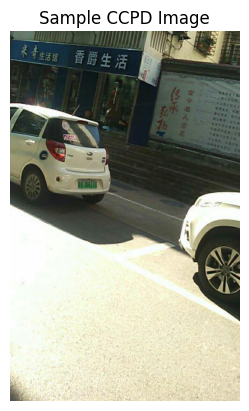

In [5]:
import os
import cv2
import matplotlib.pyplot as plt


raw_data_path = "D:/Project_Computer_vision/ALPR/data/raw"

# Walk through subfolders and collect image paths
image_files = []
for root, dirs, files in os.walk(raw_data_path):
    for f in files:
        if f.lower().endswith(('.jpg', '.png')):
            image_files.append(os.path.join(root, f))

print("Total images found:", len(image_files))

if len(image_files) > 0:
    # Load and display image
    img = cv2.imread(image_files[0])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img_rgb)
    plt.title("Sample CCPD Image")
    plt.axis("off")
    plt.show()
    

Bounding Box Coordinates: 212 467 271 489
License plate width: 59
License plate height: 22


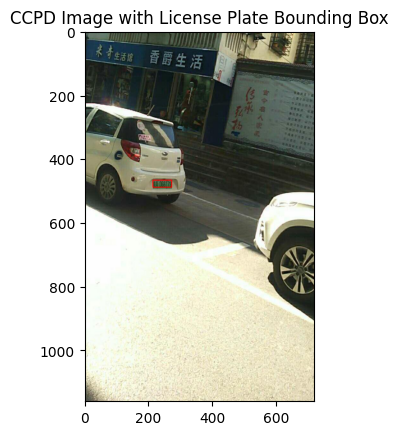

In [6]:
    # Parsing filename for bounding box 
    sample_image_path = image_files[0]
    filename_parts = os.path.basename(sample_image_path).split("-")
    
    if len(filename_parts) >= 3:
        bbox = filename_parts[2] 
        coord = bbox.split("_")
        
        X1, Y1 = map(int, coord[0].split("&"))  
        X2, Y2 = map(int, coord[1].split("&"))  
        
        print("Bounding Box Coordinates:", X1, Y1, X2, Y2)
        print("License plate width:", X2 - X1)
        print("License plate height:", Y2 - Y1)
        
        # bounding box on image
        cv2.rectangle(img_rgb, (X1, Y1), (X2, Y2), (255, 0, 0), 2)
        plt.imshow(img_rgb)
        plt.title("CCPD Image with License Plate Bounding Box")
        plt.show()


<h3>Liscence plate character enhancement</h3>

In [7]:
import os
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# CCPD character mappings - load once, use many times
PROVINCES = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", 
            "苏", "浙", "京", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", 
            "桂", "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", 
            "新", "警", "学", "O"]

LETTERS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 
           'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'O']

ALPHANUMERIC = LETTERS + [str(i) for i in range(10)] + ['O']

In [8]:
def extract_license_plate_data(image_path):
    """Extract bounding box and license text from CCPD filename."""
    filename = Path(image_path).stem  
    parts = filename.split('-')
    
    if len(parts) < 7:
        return None, None
    
    # Parse bounding box coordinates
    bbox_data = parts[2].split('_')
    x1, y1 = map(int, bbox_data[0].split('&'))
    x2, y2 = map(int, bbox_data[1].split('&'))
    
    # Decode license plate characters
    char_indices = [int(i) for i in parts[4].split('_')]
    license_text = decode_plate_characters(char_indices)
    
    return (x1, y1, x2, y2), license_text


In [9]:
def decode_plate_characters(indices):
    """Convert character indices to readable license plate text."""
    if len(indices) < 7:
        return "INVALID"
    
    try:
        # Chinese license plates: Province + Letter + 5 alphanumeric
        plate = PROVINCES[indices[0]]         # Province character
        plate += LETTERS[indices[1]]          # Second position letter
        plate += ''.join(ALPHANUMERIC[indices[i]] for i in range(2, 7))
        return plate
    except IndexError:
        return "DECODE_ERROR"

In [10]:
def visualize_sample(image_path):
    """Display image with license plate annotation."""
    img = cv2.imread(str(image_path))
    if img is None:
        return
        
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bbox, license_text = extract_license_plate_data(image_path)
    
    if bbox and license_text:
        x1, y1, x2, y2 = bbox
        
        # Draw clean bounding box
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Add license text with background for readability
        font = cv2.FONT_HERSHEY_SIMPLEX
        text_size = cv2.getTextSize(license_text, font, 0.8, 2)[0]
        
        # White background for text
        cv2.rectangle(img_rgb, (x1, y1-30), (x1+text_size[0]+10, y1), (255, 255, 255), -1)
        cv2.putText(img_rgb, license_text, (x1+5, y1-8), font, 0.8, (255, 0, 0), 2)
        
        # Display results
        plt.figure(figsize=(10, 6))
        plt.imshow(img_rgb)
        plt.title(f"License Plate: {license_text}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        print(f"Plate: {license_text} | Box: {x2-x1}x{y2-y1}px")

In [11]:
def explore_dataset(data_directory):
    """Explore CCPD dataset efficiently."""
    data_path = Path(data_directory)
    
    
    image_files = list(data_path.rglob('*.jpg'))
    
    print(f"Found {len(image_files)} images in dataset")
    
    if image_files:
        # Show first sample
        sample_image = image_files[0]
        print(f"Analyzing: {sample_image.name}")
        visualize_sample(sample_image)
    else:
        print("No images found - check your data path")

Found 11776 images in dataset
Analyzing: 0014128352490421455-90_90-212&467_271&489-271&489_212&489_212&467_271&467-0_0_3_30_30_25_31_32-79-4.jpg


C:\Users\avish\AppData\Local\Temp\ipykernel_48500\2451004819.py:29: UserWarning: Glyph 30358 (\N{CJK UNIFIED IDEOGRAPH-7696}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


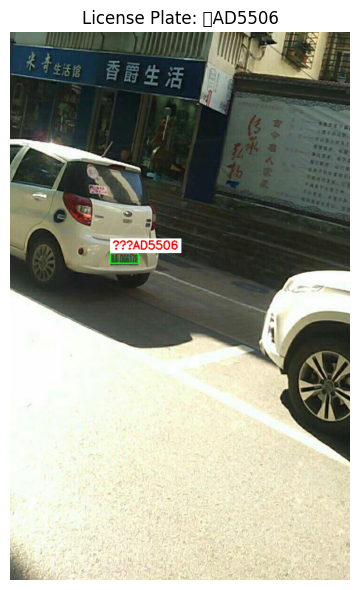

Plate: 皖AD5506 | Box: 59x22px


In [13]:
# Main execution

dataset_path = "D:/Project_Computer_vision/ALPR/data/raw"
explore_dataset(dataset_path)
